In [1]:
#Importing Required Libraries To Build Our Model 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

Loading the dataset to Pandas Dataframe

Here "fdata" is the variable representing our financial data on which we will work.


In [2]:
fdata = pd.read_csv('Fraud.csv')
print(fdata)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [3]:
#first 5 rows of the dataset
fdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Last 5 rows of the dataset


In [4]:
fdata.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# extracting some dataset information
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# check data for duplicates
fdata = fdata.drop_duplicates()

# check the number of total rows again, in this case, there are no duplicates
print('total rows and columns after drop duplicates', fdata.shape) 

total rows and columns after drop duplicates (6362620, 11)


In [7]:
#checking the number of missing values in each columns
fdata.isnull().sum()
print('Maximum number of missing values in any column: ' +
str(fdata.isnull().sum().max()))

Maximum number of missing values in any column: 0


Hence seeing the above cell it is clear that there is no missing values in our dataset. And now we can proceed smoothly

In [8]:
print(fdata['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


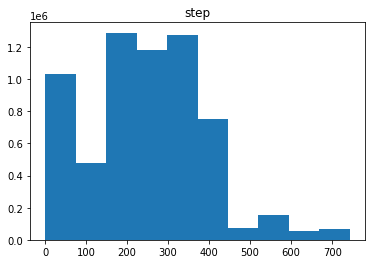

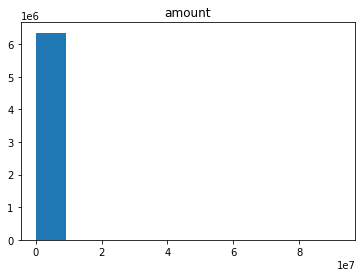

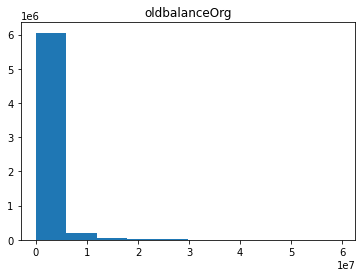

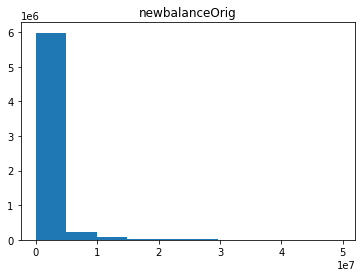

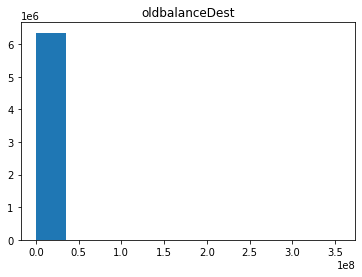

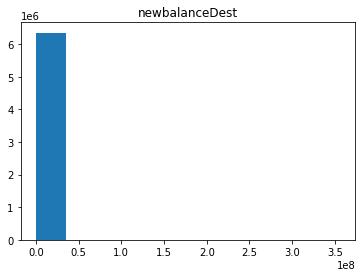

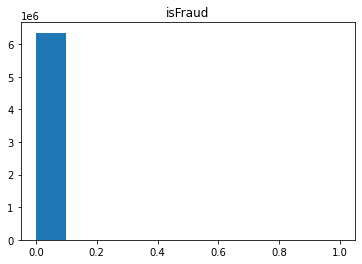

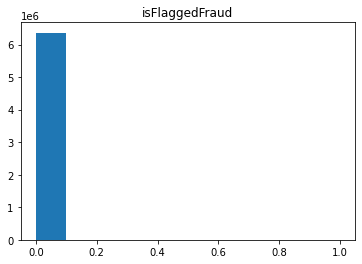

In [9]:
# create column list, so all modifications made to the orignal dataframe
num_col_list = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
char_col_list = ['type','nameOrig','nameDest'] 
# check distributions for all numeric variables --- consider normalize distribution before modelings
for i in fdata[num_col_list]:
    plt.hist(fdata[i])
    plt.title(i)
    plt.show()

Step Column distribution is close to normal distribution , the rest of them is not normal distribution


<AxesSubplot:>

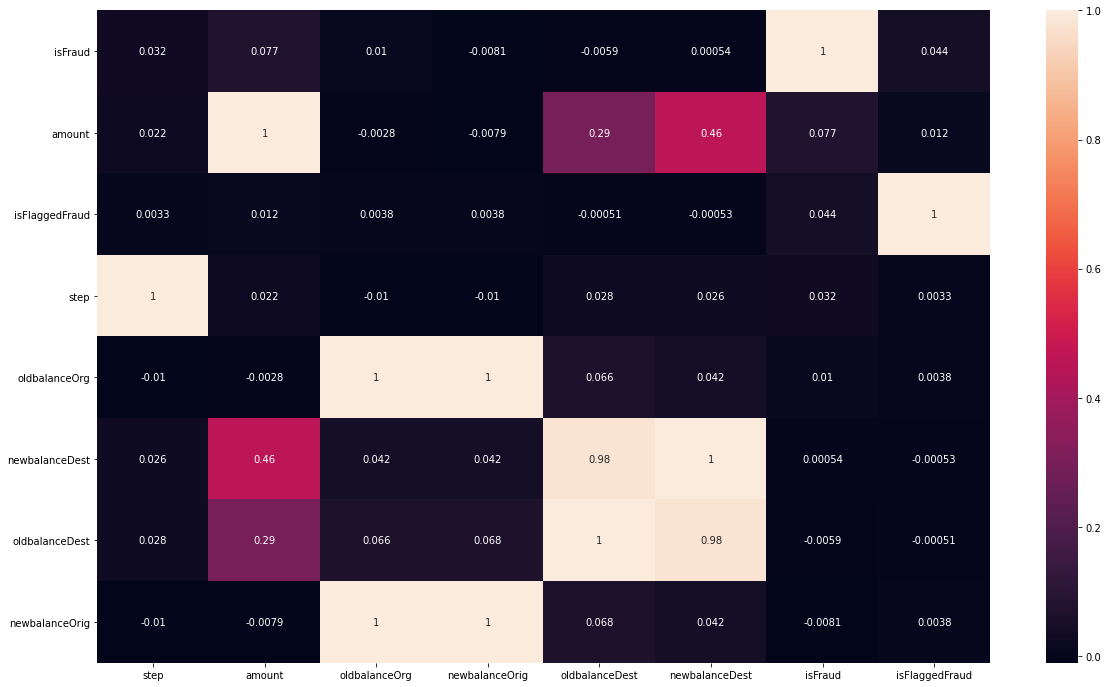

In [10]:
#Checking the Correlation in the numerical columns
import seaborn as sns
Cor = fdata.corr()
Cor.sort_values(by=['isFraud'] , ascending = False , inplace = True)
f,ax = plt.subplots(figsize = (20,12))
sns.heatmap(Cor,annot=True)

Through Above plotting it is clear 
isFraud is not strongly correlated with any columns

isFraud is not strongly correlated with isFlaggedFraud , which was to expected 

Collinearity:
    ## amount is somewhat, and moderately correlated with oldbalanceDest and newbalanceDest
    ## oldbalanceDest and newbalanceDest is strongly correlated
    ## oldbalanceOrg and newbalanceOrig is strongly correlated


In [11]:
# Let's verify some relationships between the columns using pivot table
pd.pivot_table(fdata, index = 'isFraud', values = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud'])

,amount,isFlaggedFraud,newbalanceDest,newbalanceOrig,oldbalanceDest,oldbalanceOrg,step
isFraud,,,,,,,
0,1.781970e+05,0.000000,1.224926e+06,855970.228109,1.101421e+06,8.328287e+05,243.235663
1,1.467967e+06,0.001948,1.279708e+06,192392.631836,5.442496e+05,1.649668e+06,368.413856


From Above results it looks like: amount, isFlaggedFraud, newbalanceDest, oldbalanceOrg, step might have an impact on fraud !

In [12]:
#Checking the total char data present in the "type","nameOrig","nameDest"
fdata[char_col_list].nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [13]:
# There is a lot of char data present in nameOrig and nameDest . Now we are going to rename these features into C(Customer) and M(Merchant) and perform some Feature Engineering

fdata['nameOrig_class'] = fdata['nameOrig'].apply(lambda x:x[0:1])
fdata['nameOrig_class'].value_counts()
fdata['nameDest_class'] = fdata['nameDest'].apply(lambda x: x[0:1])
fdata['nameDest_class'].value_counts()

C    4211125
M    2151495
Name: nameDest_class, dtype: int64

// Now As we have 5 types of transactions in our Dataset , we going to check the frequency of transaction in each type . After checking the frequency we going to determine in which type the fraud transaction are to be expected. 

c:\users\hardik\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


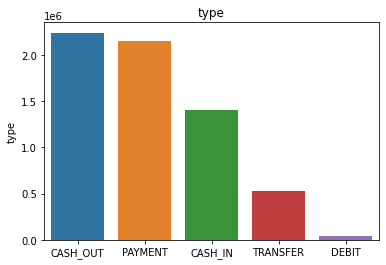

c:\users\hardik\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


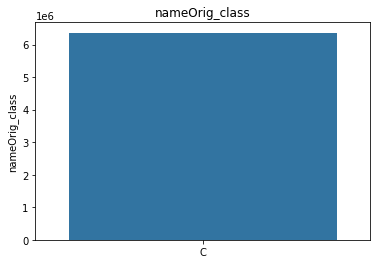

c:\users\hardik\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


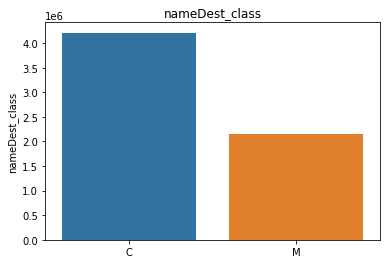

In [14]:
for i in fdata[['type','nameOrig_class','nameDest_class']]:
    sns.barplot(fdata[i].value_counts().index,fdata[i].value_counts()).set_title(i)
    plt.show()

In [15]:
#comparing fraud by type, nameOrig_class, nameDest_class
print(pd.pivot_table(fdata, index = 'isFraud', columns = 'type', values = 'nameDest' ,aggfunc ='count'))
print(pd.pivot_table(fdata, index = 'isFraud', columns = 'nameOrig_class', values = 'nameDest' ,aggfunc ='count'))
print(pd.pivot_table(fdata, index = 'isFraud', columns = 'nameDest_class', values = 'nameDest' ,aggfunc ='count'))

type       CASH_IN   CASH_OUT    DEBIT    PAYMENT  TRANSFER
isFraud                                                    
0        1399284.0  2233384.0  41432.0  2151495.0  528812.0
1              NaN     4116.0      NaN        NaN    4097.0
nameOrig_class        C
isFraud                
0               6354407
1                  8213
nameDest_class          C          M
isFraud                             
0               4202912.0  2151495.0
1                  8213.0        NaN


From Above Comparison , it is likely that "Cash_out" And "Transfer" are the only index associated with the Transaction Fraud

And The Fraud is only from the Customer side not from the Merchant's.

norm_amount


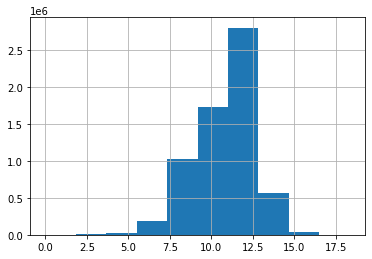

norm_isFlaggedFraud


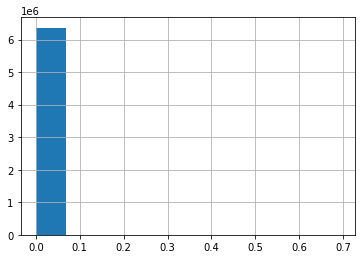

norm_newbalanceDest


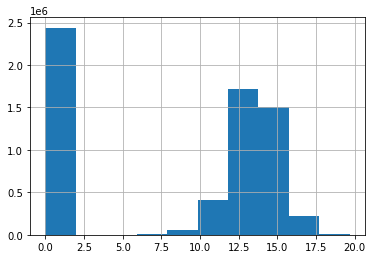

norm_oldbalanceOrg


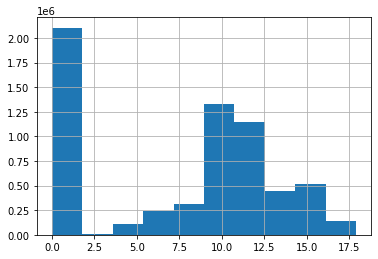

norm_step


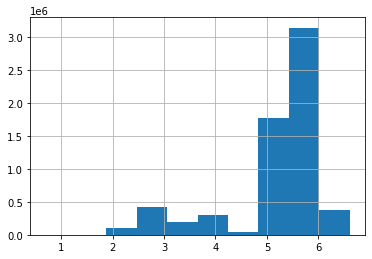

In [16]:
# try nomralizing amount, isFlaggedFraud, newbalanceDest, oldbalanceOrg, step --
# the numerical columns look like impacted Fraud

for i in ['amount', 'isFlaggedFraud', 'newbalanceDest', 'oldbalanceOrg', 'step']:
    print(f'norm_{i}')
    fdata[f'norm_{i}'] = np.log(fdata[f'{i}']+1)
    fdata[f'norm_{i}'].hist()
    plt.show()

In [17]:
# create dummy values for character columns
dummy_data = pd.get_dummies(fdata[['type', 'nameOrig_class', 'nameDest_class']])
dummy_data.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_class_C,nameDest_class_C,nameDest_class_M
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,0,1,1,1,0
3,0,1,0,0,0,1,1,0
4,0,0,0,1,0,1,0,1


In [18]:
#concating this dummy values into our dataset
total_data = pd.concat([fdata,dummy_data] , axis =1 )
total_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,norm_oldbalanceOrg,norm_step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_class_C,nameDest_class_C,nameDest_class_M
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,12.044359,0.693147,0,0,0,1,0,1,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,9.964112,0.693147,0,0,0,1,0,1,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,5.204007,0.693147,0,0,0,0,1,1,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,5.204007,0.693147,0,1,0,0,0,1,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,10.634773,0.693147,0,0,0,1,0,1,0,1


This Dataset is Highly unbalanced 
So we are going to Create A dummy dataset in which the fraud and Non Fraud Transactions are balance in the number i.e., 1:1 ratio 
0-> Normal Transaction 
1-> Fradulent Transaction 

In [19]:
#separating the data into legit and fraud 
legit = fdata[fdata.isFraud == 0]
fraud = fdata[fdata.isFraud == 1]
print(legit.shape)
print(fraud.shape)

(6354407, 18)
(8213, 18)


In [32]:
#Now Building a Dummy Dataset containing similar distribution of normal transaction and fraudulent transaction
from random import sample
legit_sample = legit.sample(n=16426)

In [33]:
#Concatenating Two Dataframes which means legit_sample and Fraud 
new_data = pd.concat([legit_sample , fraud] , axis = 0) #axis = 0 because we need the result in the row arrangement
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_class,nameDest_class,norm_amount,norm_isFlaggedFraud,norm_newbalanceDest,norm_oldbalanceOrg,norm_step
4842753,347,CASH_OUT,142686.96,C2066288763,67248.00,0.00,C445235113,1369683.34,1512370.30,0,0,C,C,11.868415,0.0,14.229189,11.116157,5.852202
1139448,131,CASH_IN,95454.55,C501835578,2606464.78,2701919.33,C322365934,694695.95,708047.03,0,0,C,C,11.466416,0.0,13.470267,14.773506,4.882802
6244041,595,CASH_OUT,65019.02,C1880804176,29277.00,0.00,C154667133,1875508.84,3100657.71,0,0,C,C,11.082451,0.0,14.947125,10.284592,6.390241
5559292,384,PAYMENT,3511.70,C1218034491,198241.00,194729.30,M1184604593,0.00,0.00,0,0,C,M,8.164140,0.0,0.000000,12.197244,5.953243
5683399,397,CASH_OUT,56270.01,C774205935,0.00,0.00,C723700020,550697.68,606967.68,0,0,C,C,10.937935,0.0,13.316232,0.000000,5.986452


In [22]:
new_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_class,nameDest_class,norm_amount,norm_isFlaggedFraud,norm_newbalanceDest,norm_oldbalanceOrg,norm_step
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C,12.735768,0.0,12.735768,12.735768,6.612041
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,C,15.657870,0.0,0.000000,15.657870,6.612041
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C,15.657870,0.0,15.668663,15.657870,6.612041
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,C,13.652996,0.0,0.000000,13.652996,6.612041
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,C,C,13.652996,0.0,15.811584,13.652996,6.612041


In [34]:
new_data['isFraud'].value_counts()

0    16426
1     8213
Name: isFraud, dtype: int64

As you can see above our dataset is now purely balanced out.
Now we can smoothly approach to Train and Test our Data

In [35]:
dsfm = new_data[['isFraud',
             'norm_amount', 'norm_isFlaggedFraud', 'norm_newbalanceDest', 'norm_oldbalanceOrg', 'norm_step',
             'type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','nameOrig_class_C','nameDest_class_C','nameDest_class_M']]

KeyError: "['type_DEBIT', 'nameOrig_class_C', 'type_TRANSFER', 'type_CASH_OUT', 'nameDest_class_M', 'type_PAYMENT', 'nameDest_class_C', 'type_CASH_IN'] not in index"

In [24]:
new_data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,norm_amount,norm_isFlaggedFraud,norm_newbalanceDest,norm_oldbalanceOrg,norm_step
isFraud,,,,,,,,,,,,
0,241.939669,1.723283e+05,8.400139e+05,863254.964562,1.068742e+06,1.183952e+06,0.000000,10.822651,0.00000,8.296758,7.319454,5.181080
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948,12.892027,0.00135,6.908510,12.864916,5.604233


# Splitting the data into features and targets

In [25]:
x = new_data.drop(columns='isFraud',axis=1) #axis=1 because we need the result in column arrangement
y = new_data['isFraud']

print(x)

         step      type      amount     nameOrig  oldbalanceOrg  \
4656604   330  CASH_OUT   353250.79  C1340397584           0.00   
3422280   256   PAYMENT     5391.96  C2145247057       22293.00   
1589966   155   CASH_IN   171412.85  C1097481430        2045.00   
3574848   261   PAYMENT     8120.03  C2145621849       21200.00   
4987657   352   CASH_IN    98912.22  C1804873404       41284.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
4656604            0.00  C1194392243     23446170.06     23799420.85   
3422280        16901.04  M1085710896            0.0

In [26]:
print(y)

4656604    0
3422280    0
1589966    0
3574848    0
4987657    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 24639, dtype: int64


In [29]:
#train_test_splitting of the dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

In [30]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

ValueError: could not convert string to float: 'PAYMENT'

# Model Building

Here i will use two Algorithm which are :-
Decision Tree Algorithm ;
   Random Forest Tree Algorithm 


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# random forest tree
rfc=RandomForestClassifier(random_state=1234)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))